Problem Statement:
One of the hospitals has a patient dataset that contains a wide range of heart-related features. This data allows hospital staff to conduct detailed analyses of heart-related conditions and treatments. We must build a logistic regression model to predict whether a patient has heart disease or not. Calculate the feature importance as well. The dataset contains data for around 303 patients.

# Data Description:

- age: Age of the patient in years.
- gender: Gender of the patient.
- cp: Chest pain type.
- trestbps: Resting blood pressure (in mm Hg on admission to the hospital).
- chol: Serum cholesterol in mg/dl.
- fbs: fasting blood sugar > 120 mg/dl (1 = true; 0 = false).
- restecg: Resting electrocardiographic results.
- thalach: Maximum heart rate achieved.
- exang: Exercise induced angina (1 = yes; 0 = no).
- oldpeak: ST depression induced by exercise relative to rest.
- slope: The slope of the peak exercise ST segment.
- ca: Number of major vessels (0-3) colored by fluoroscopy.
- thal: 3 = normal; 6 = fixed defect; 7 = reversible defect.
- heart_diagnosis: Diagnosis of heart disease (angiographic disease status) (0 = No heart disease, >0 = heart disease).


## Table of Content

1: Import Libraries

2: Data Preparation

2.1: Modification of target variable

2.1: Summary statistics for numerical data

2.1: Summary statistics for categorical data

3: EDA

3.1: Unvariate Analysis

3.1.1: Numerical variables

3.1.2: Categorical variables

3.2: Bivariate Analysis

3.2.1 Numerical Features vs Target

3.2.2 Categorical Features vs Target

4: Outlier Treatment

5: Data Preprocessing and Feature Engineering

5.1: Numeric columns: scaling

5.1.1: Scaling Numeric features to same scale

5.2: Categorical columns: scaling

5.2.1: Binary features

5.2.2: Multiclass features

5.3: Build Feature dataframe

5.4: Feature Selection

6: Model Training

6.1: Feature Importance

7: Model evaluation

7.1: confusion_matrix

7.2: Feature Engineering Pipeline on test data

7.3: Performance Evaluation Metrics

7.4: ROC curve

1: Import Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 2: Data Preparation

In [3]:
# Read dataset
heart_df = pd.read_csv(r'C:\Users\Menka\Downloads\heart_disease.csv')
heart_df.head()

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heart_diagnosis
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [4]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              303 non-null    float64
 1   gender           303 non-null    float64
 2   cp               303 non-null    float64
 3   trestbps         303 non-null    float64
 4   chol             303 non-null    float64
 5   fbs              303 non-null    float64
 6   restecg          303 non-null    float64
 7   thalach          303 non-null    float64
 8   exang            303 non-null    float64
 9   oldpeak          303 non-null    float64
 10  slope            303 non-null    float64
 11  ca               299 non-null    float64
 12  thal             301 non-null    float64
 13  heart_diagnosis  303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


In [5]:
heart_df.isnull().sum()

age                0
gender             0
cp                 0
trestbps           0
chol               0
fbs                0
restecg            0
thalach            0
exang              0
oldpeak            0
slope              0
ca                 4
thal               2
heart_diagnosis    0
dtype: int64

ca and thal has 4 and 2 missing data respectively

In [6]:
count=0
for i in heart_df.isnull().sum(axis=1):
    if i>0:
        count=count+1
print('Total number of rows with missing values is ', count)
print('since it is only',round((count/len(heart_df.index))*100), 'percent of the entire dataset the rows with missing values are excluded.')

Total number of rows with missing values is  6
since it is only 2 percent of the entire dataset the rows with missing values are excluded.


In [7]:
heart_df.dropna(axis=0,inplace=True)

In [8]:
heart_df.duplicated().sum()

0

2.1: Modification of Target Variable

In [9]:
# lets explore the target feature
heart_df['heart_diagnosis'].value_counts()

heart_diagnosis
0    160
1     54
2     35
3     35
4     13
Name: count, dtype: int64

Description: Diagnosis of heart disease (angiographic disease status) (0 = No heart disease, >0 = heart disease).

In [10]:
# Replace values greater than 0 with 1
heart_df['heart_diagnosis'] = heart_df['heart_diagnosis'].apply(lambda x: 1 if x > 0 else x)

# Verify the value counts after modification
print(heart_df['heart_diagnosis'].value_counts())

heart_diagnosis
0    160
1    137
Name: count, dtype: int64


In [11]:
heart_df.dtypes

age                float64
gender             float64
cp                 float64
trestbps           float64
chol               float64
fbs                float64
restecg            float64
thalach            float64
exang              float64
oldpeak            float64
slope              float64
ca                 float64
thal               float64
heart_diagnosis      int64
dtype: object

In [12]:
# Renaming 'heart_diagnosis' to 'target' for better clarity
heart_df.rename(columns={'heart_diagnosis': 'target'}, inplace=True)

Based on the data types and the Data description, we can see that 9 columns (gender, cp, fbs, restecg, exang, slope, ca, thal, and heart_diagnosis) are indeed numerical in terms of data type, but categorical in terms of their semantics. These features should be converted to string (object) data type for proper analysis and interpretation:

In [13]:
# Define the continuous features
continuous_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Identify the features to be converted to object data type
features_to_convert = [feature for feature in heart_df.columns if feature not in continuous_features]

# Convert the identified features to object data type
heart_df[features_to_convert] = heart_df[features_to_convert].astype('object')

heart_df.dtypes

age         float64
gender       object
cp           object
trestbps    float64
chol        float64
fbs          object
restecg      object
thalach     float64
exang        object
oldpeak     float64
slope        object
ca           object
thal         object
target       object
dtype: object

2.2: summary statistics for numerical data

In [14]:
heart_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,297.0,54.542088,9.049736,29.0,48.0,56.0,61.0,77.0
trestbps,297.0,131.693603,17.762806,94.0,120.0,130.0,140.0,200.0
chol,297.0,247.350168,51.997583,126.0,211.0,243.0,276.0,564.0
thalach,297.0,149.599327,22.941562,71.0,133.0,153.0,166.0,202.0
oldpeak,297.0,1.055556,1.166123,0.0,0.0,0.8,1.6,6.2


## Numerical Features:

- age: The average age of the patients is approximately 54.54 years, with the youngest being 29 and the oldest 77 years.
- trestbps:The average resting blood pressure is about 131.69 mm Hg, ranging from 94 to 200 mm Hg.
- chol: The average cholesterol level is approximately 247.35 mg/dl, with a minimum of 126 and a maximum of 564 mg/dl.
- thalach: The average maximum heart rate achieved is around 149.59, with a range from 71 to 202.
- oldpeak: The average ST depression induced by exercise relative to rest is about 1.05, with values ranging from 0 to 6.2.

2.3: Summary statistics for categorical variables

In [15]:
heart_df.describe(include='object')

,gender,cp,fbs,restecg,exang,slope,ca,thal,target
count,297.0,297.0,297.0,297.0,297.0,297.0,297.0,297.0,297
unique,2.0,4.0,2.0,3.0,2.0,3.0,4.0,3.0,2
top,1.0,4.0,0.0,0.0,0.0,1.0,0.0,3.0,0
freq,201.0,142.0,254.0,147.0,200.0,139.0,174.0,164.0,160


### Categorical Features (object data type):

- gender: There are two unique values, with males (denoted as 1) being the most frequent category, occurring 201 times out of 297 entries.
- cp: Four unique types of chest pain are present. The most common type is "0", occurring 142 times.
- fbs: There are two categories, and the most frequent one is "0" (indicating fasting blood sugar less than 120 mg/dl), which appears 254 times.
- restecg: Three unique results are present. The most common result is "0", appearing 147 times.
- exang: There are two unique values. The most frequent value is "0" (indicating no exercise-induced angina), which is observed 200 times.
- slope: Three unique slopes are present. The most frequent slope type is "1", which occurs 139 times.
- ca: There are four unique values for the number of major vessels colored by fluoroscopy, with "0" being the most frequent, occurring 174 times.
- thal: three unique results are available. The most common type is "3" (indicating a normal defect), observed 164 times.
- target(heart_diagnosis): Two unique values indicate the presence(inidated by 1) or absence(indicated by 0) of heart disease. - The value "0" (indicating no heart disease) is the most frequent, observed in 160 entries.

3: EDA

3.1: Unvariate Analysis

3.1.1: Numerical variables

In [16]:
continuous_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

df_continuous = heart_df[continuous_features]

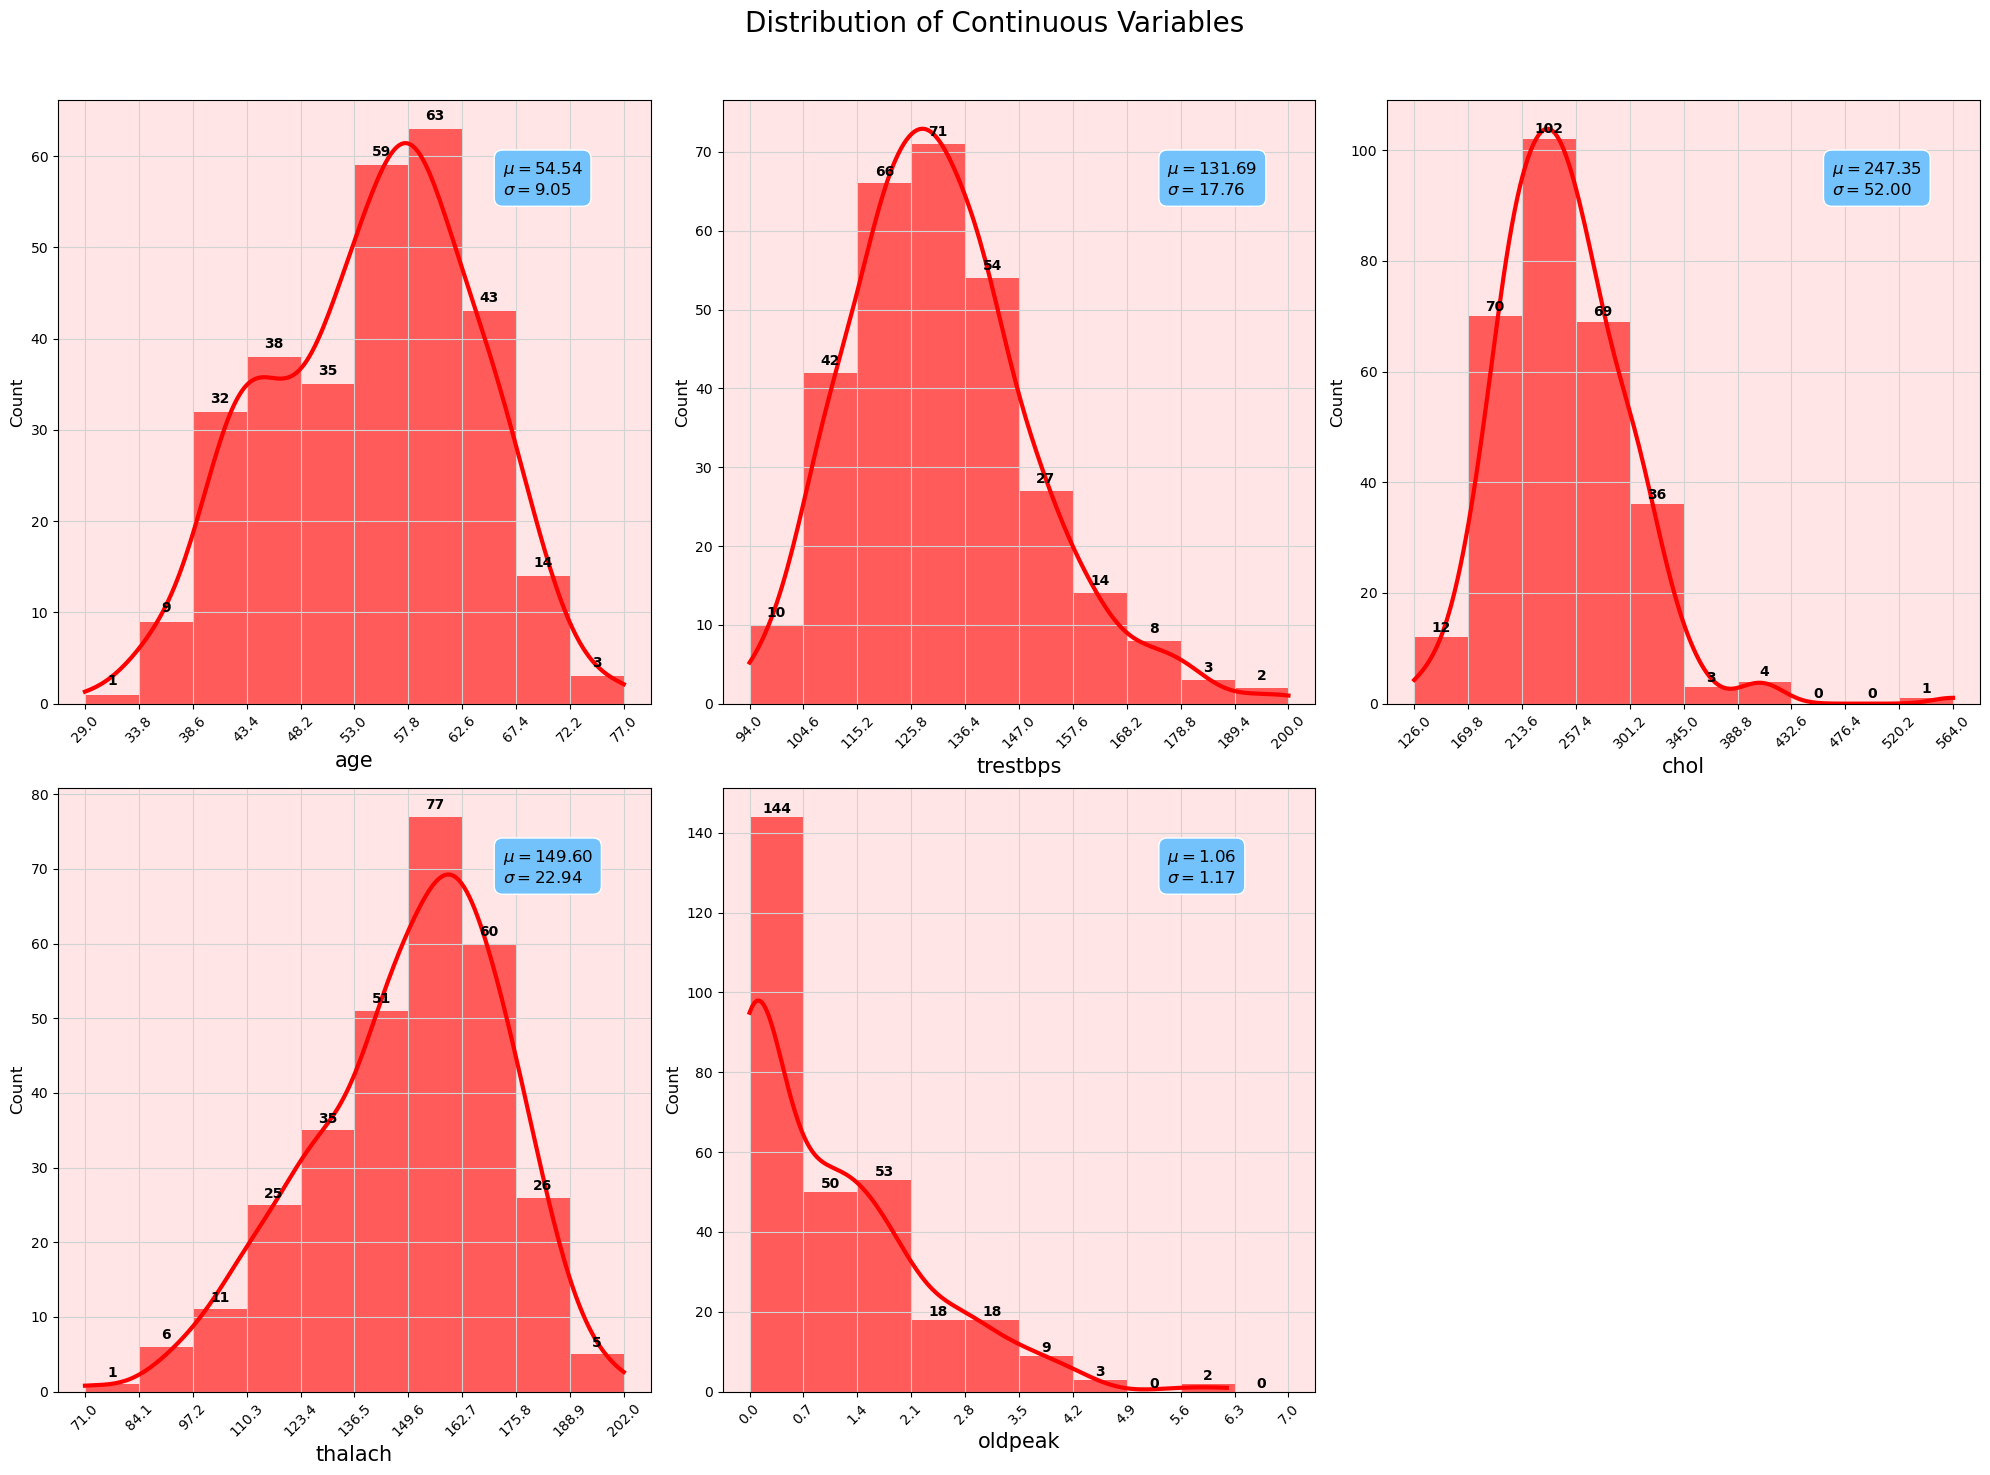

In [17]:
# Set up the subplot
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20, 15))

# Loop to plot histograms for each continuous feature
for i, col in enumerate(df_continuous.columns):
    x = i // 3
    y = i % 3
    values, bin_edges = np.histogram(df_continuous[col], 
                                     range=(np.floor(df_continuous[col].min()), np.ceil(df_continuous[col].max())))
    
    graph = sns.histplot(data=df_continuous, x=col, bins=bin_edges, kde=True, ax=ax[x, y],
                         edgecolor='none', color='red', alpha=0.6, line_kws={'lw': 3})
    ax[x, y].set_xlabel(col, fontsize=15)
    ax[x, y].set_ylabel('Count', fontsize=12)
    ax[x, y].set_xticks(np.round(bin_edges, 1))
    ax[x, y].set_xticklabels(ax[x, y].get_xticks(), rotation=45)
    ax[x, y].grid(color='lightgrey')
    
    ax[x, y].set_facecolor('#ffe5e5')  
    
    for j, p in enumerate(graph.patches):
        ax[x, y].annotate('{}'.format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height() + 1),
                          ha='center', fontsize=10, fontweight="bold")
    
    textstr = '\n'.join((
        r'$\mu=%.2f$' % df_continuous[col].mean(),
        r'$\sigma=%.2f$' % df_continuous[col].std()
    ))
    ax[x, y].text(0.75, 0.9, textstr, transform=ax[x, y].transAxes, fontsize=12, verticalalignment='top',
                  color='black', bbox=dict(boxstyle='round', facecolor='#73c2fb', edgecolor='white', pad=0.5))

ax[1,2].axis('off')
plt.suptitle('Distribution of Continuous Variables', fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()


## Inferences:

- Age (age): The distribution is somewhat uniform, but there's a peak around the late 50s. The mean age is approximately 54.54 years with a standard deviation of 9.04 years.
- Resting Blood Pressure (trestbps): The resting blood pressure for most individuals is concentrated around 120-140 mm Hg, with a mean of approximately 131.69 mm Hg and a standard deviation of 17.60 mm Hg.
- Serum Cholesterol (chol): Most individuals have cholesterol levels between 200 and 300 mg/dl. The mean cholesterol level is around 246.69 mg/dl with a standard deviation of 51.78 mg/dl.
- Maximum Heart Rate Achieved (thalach): The majority of the individuals achieve a heart rate between 140 and 170 bpm during a stress test. The mean heart rate achieved is approximately 149.61 bpm with a standard deviation of 22.88 bpm.
- ST Depression Induced by Exercise (oldpeak): Most of the values are concentrated towards 0, indicating that many individuals did not experience significant ST depression during exercise. The mean ST depression value is 1.04 with a standard deviation of 1.16.

3.1.2: Categorical variables

In [18]:
categorical_features = heart_df.columns.difference(continuous_features)
df_categorical = heart_df[categorical_features]

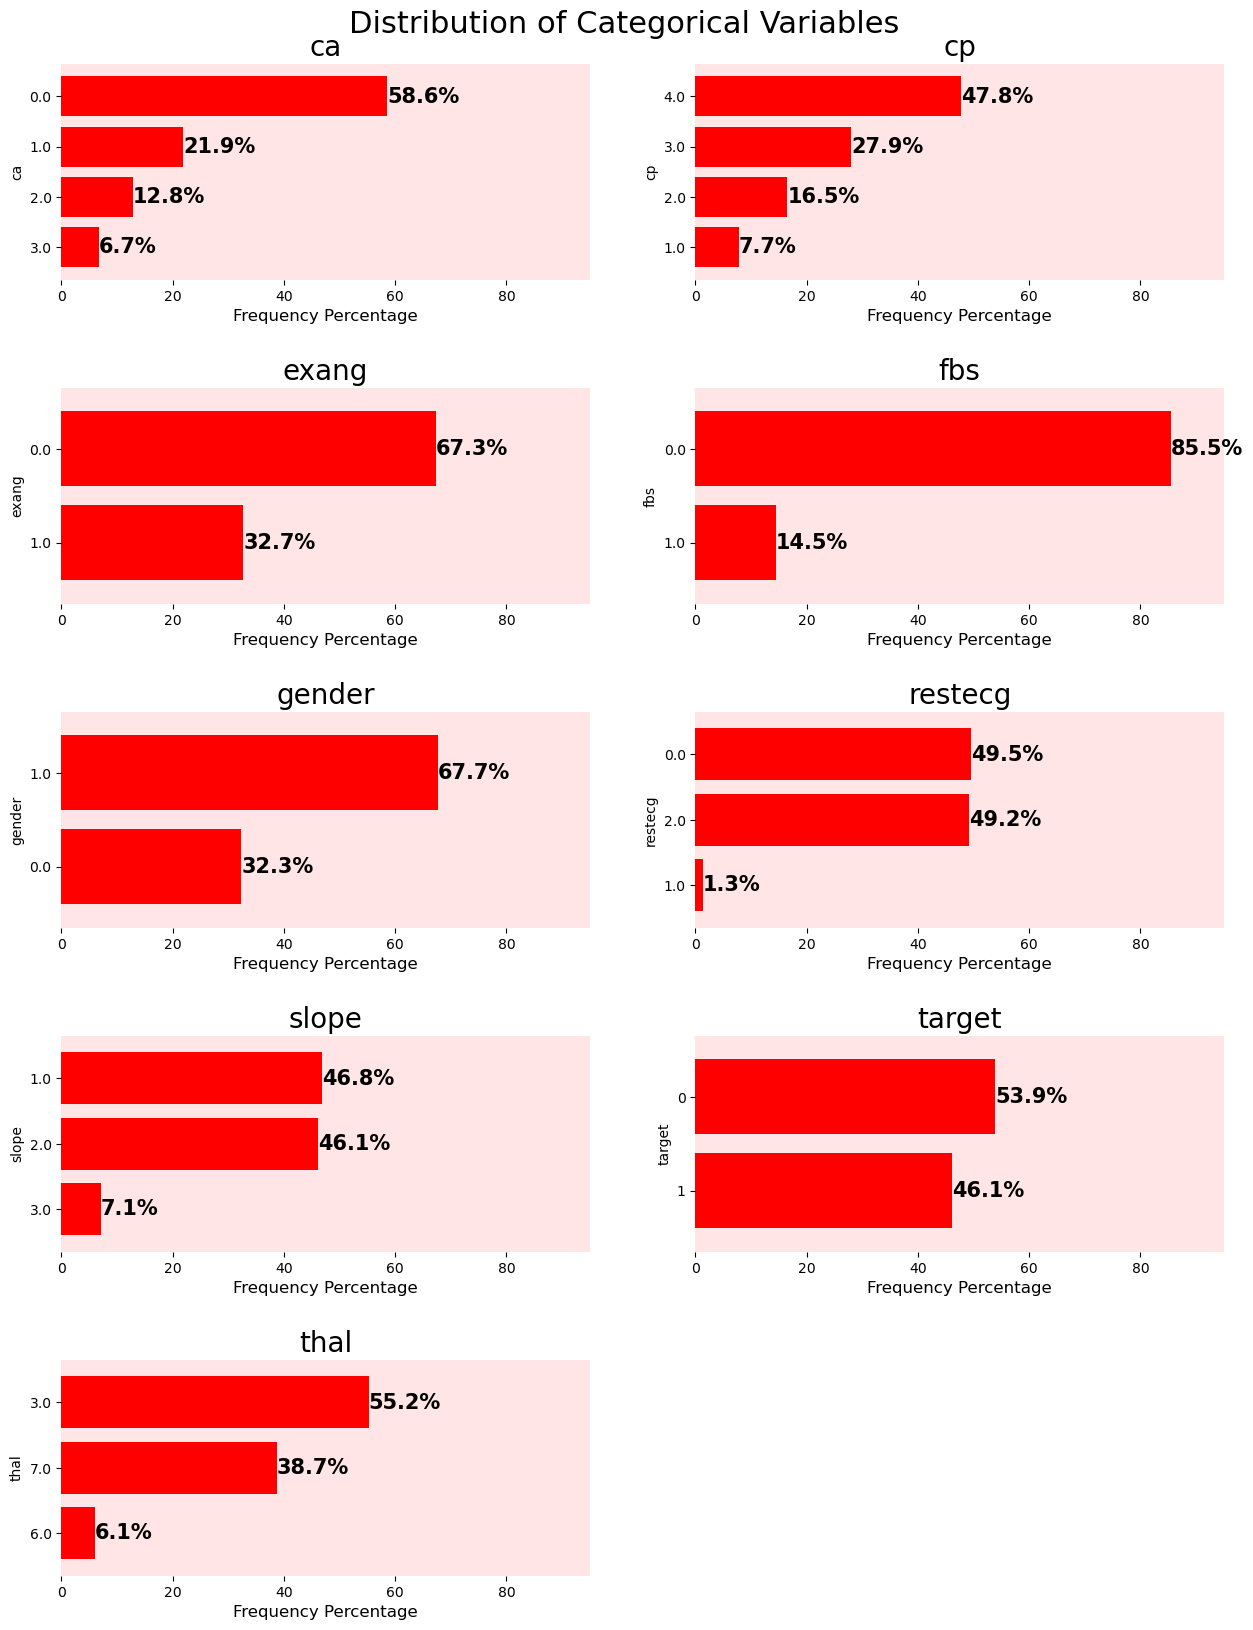

In [19]:
# Set up the subplot for a 4x2 layout
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(15, 18), gridspec_kw={'hspace': 0.5})

# Loop to plot bar charts for each categorical feature in the 4x2 layout
for i, col in enumerate(categorical_features):
    row = i // 2
    col_idx = i % 2
    
    # Calculate frequency percentages
    value_counts = heart_df[col].value_counts(normalize=True).mul(100).sort_values()
    
    # Plot bar chart
    value_counts.plot(kind='barh', ax=ax[row, col_idx], width=0.8, color='red')
    
    # Add frequency percentages to the bars
    for index, value in enumerate(value_counts):
        ax[row, col_idx].text(value, index, str(round(value, 1)) + '%', fontsize=15, weight='bold', va='center')
    
    ax[row, col_idx].set_xlim([0, 95])
    ax[row, col_idx].set_xlabel('Frequency Percentage', fontsize=12)
    ax[row, col_idx].set_title(f'{col}', fontsize=20)
    ax[row, col_idx].set_facecolor('#ffe5e5')  
    
    # Remove outer border
    ax[row, col_idx].spines['top'].set_visible(False)
    ax[row, col_idx].spines['right'].set_visible(False)
    ax[row, col_idx].spines['bottom'].set_visible(False)
    ax[row, col_idx].spines['left'].set_visible(False)


ax[4,1].axis('off')
plt.suptitle('Distribution of Categorical Variables', fontsize=22)
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

### Inferences:

- Number of Major Vessels Colored by Fluoroscopy (ca): Most patients have fewer major vessels colored by fluoroscopy, with '0' being the most frequent.
- Type of Chest Pain (cp): The dataset shows varied chest pain types among patients. Type 4 seems to be the most prevalent, but an exact distribution among the types can be inferred from the bar plots.
- Exercise-Induced Angina (exang): A majority of the patients do not experience exercise-induced angina, suggesting that it might not be a common symptom among the patients in this dataset.
- Fasting Blood Sugar (fbs): A significant majority of the patients have their fasting blood sugar level below 120 mg/dl, indicating that high blood sugar is not a common condition in this dataset.
- Gender: The dataset is predominantly male, constituting a significant majority.
- Target(heart_diagnosis): The dataset is nearly balanced in terms of heart disease presence, with about 46.1% having it and 53.9% not having it.
- Resting Electrocardiographic Results (restecg): The results show varied resting electrocardiographic outcomes, with certain types being more common than others. The exact distribution can be gauged from the plots.
- Slope of the Peak Exercise ST Segment (slope): The dataset shows different slopes of the peak exercise ST segment. A specific type might be more common, and its distribution can be inferred from the bar plots.
- Thalium Stress Test Result (thal): The dataset displays a variety of thalium stress test results. One particular type seems to be more prevalent, but the exact distribution can be seen in the plots.

3.2: Bivariate Analysis

3.2.1 Numerical Features vs Target

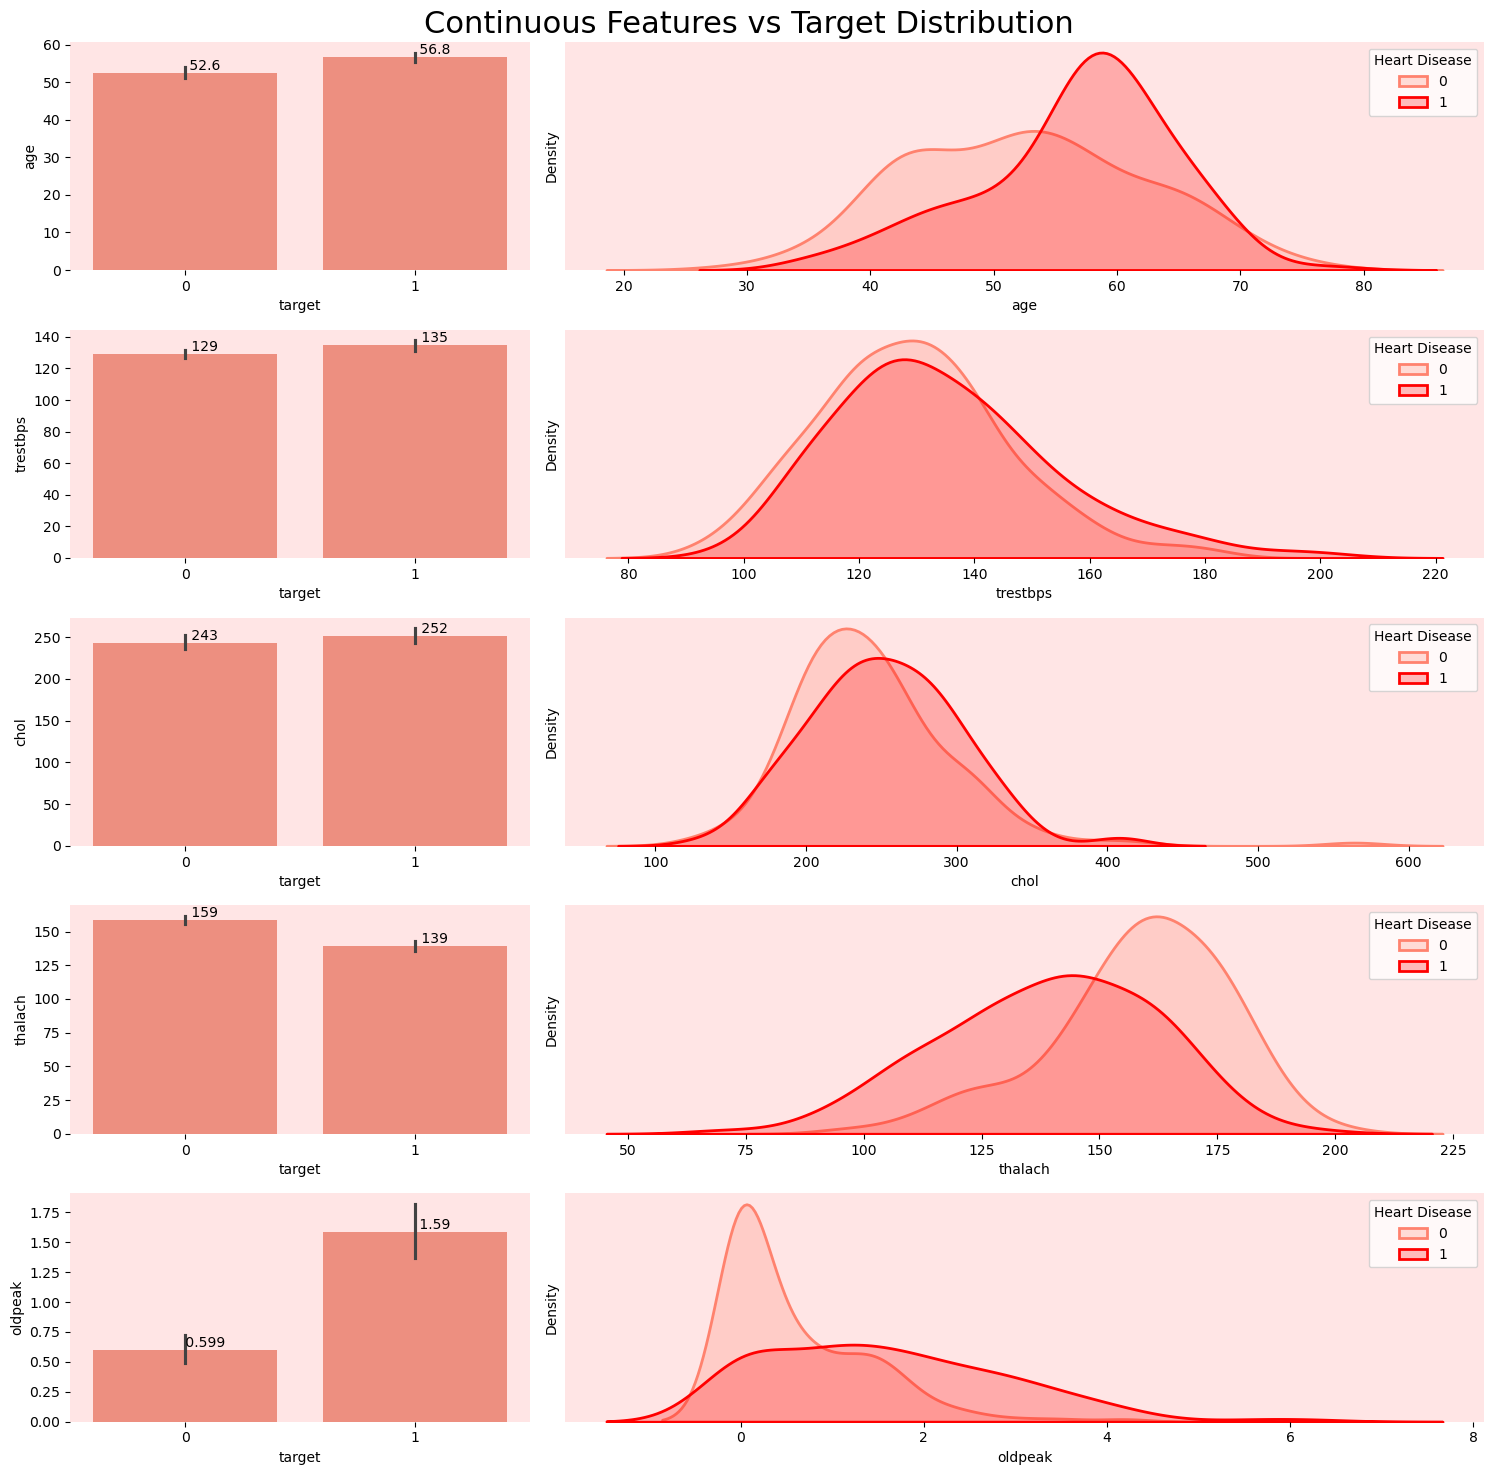

In [20]:
# Set color palette
sns.set_palette(['#ff826e', 'red'])

# Create the subplots
fig, ax = plt.subplots(len(continuous_features), 2, figsize=(15,15), gridspec_kw={'width_ratios': [1, 2]})

# Loop through each continuous feature to create barplots and kde plots
for i, col in enumerate(continuous_features):
    # Barplot showing the mean value of the feature for each target category
    graph = sns.barplot(data=heart_df, x="target", y=col, ax=ax[i,0])
    
    # KDE plot showing the distribution of the feature for each target category
    sns.kdeplot(data=heart_df[heart_df["target"]==0], x=col, fill=True, linewidth=2, ax=ax[i,1], label='0')
    sns.kdeplot(data=heart_df[heart_df["target"]==1], x=col, fill=True, linewidth=2, ax=ax[i,1], label='1')
    ax[i,1].set_yticks([])
    ax[i,1].legend(title='Heart Disease', loc='upper right')
    ax[i,0].set_facecolor('#ffe5e5')  
    ax[i,1].set_facecolor('#ffe5e5')  
    
    # Remove outer border barplot
    for spine in ax[i,0].spines.values():
        spine.set_visible(False)
        
    # Remove outer border kde plor
    for spine in ax[i,1].spines.values():
        spine.set_visible(False)
    
    # Add mean values to the barplot
    for cont in graph.containers:
        graph.bar_label(cont, fmt='         %.3g')
        
# Set the title for the entire figure
plt.suptitle('Continuous Features vs Target Distribution', fontsize=22)
plt.tight_layout()                     
plt.show()

### Inferences:

- Age (age): The distributions show a noticeable shift, with patients having heart disease being older on average than those without. The mean age for patients with heart disease is higher.
- Resting Blood Pressure (trestbps): Both categories display overlapping distributions in the KDE plot, with nearly identical mean values, indicating limited differentiating power for this feature.
- Serum Cholesterol (chol): The distributions of cholesterol levels for both categories are quite close, but the mean cholesterol level for patients with heart disease is slightly higher.
- Maximum Heart Rate Achieved (thalach): Patients with heart disease tend to achieve a lower maximum heart rate during stress tests compared to those without.
- ST Depression (oldpeak): The distributions shows wider spread for heart patients, whereas the distribution peaks near zero for non-disease. The mean ST depression induced by exercise relative to rest is notably higher for patients with heart disease

## Based on the visual difference in distributions and mean values,Age(age) seems to have the most impact on the heart disease status, followed by ST Depression (oldpeak) and Serum Cholesterol (chol).

3.2.2 Categorical Features vs Target

In [21]:
# Remove 'target' from the categorical_features
categorical_features = [feature for feature in categorical_features if feature != 'target']

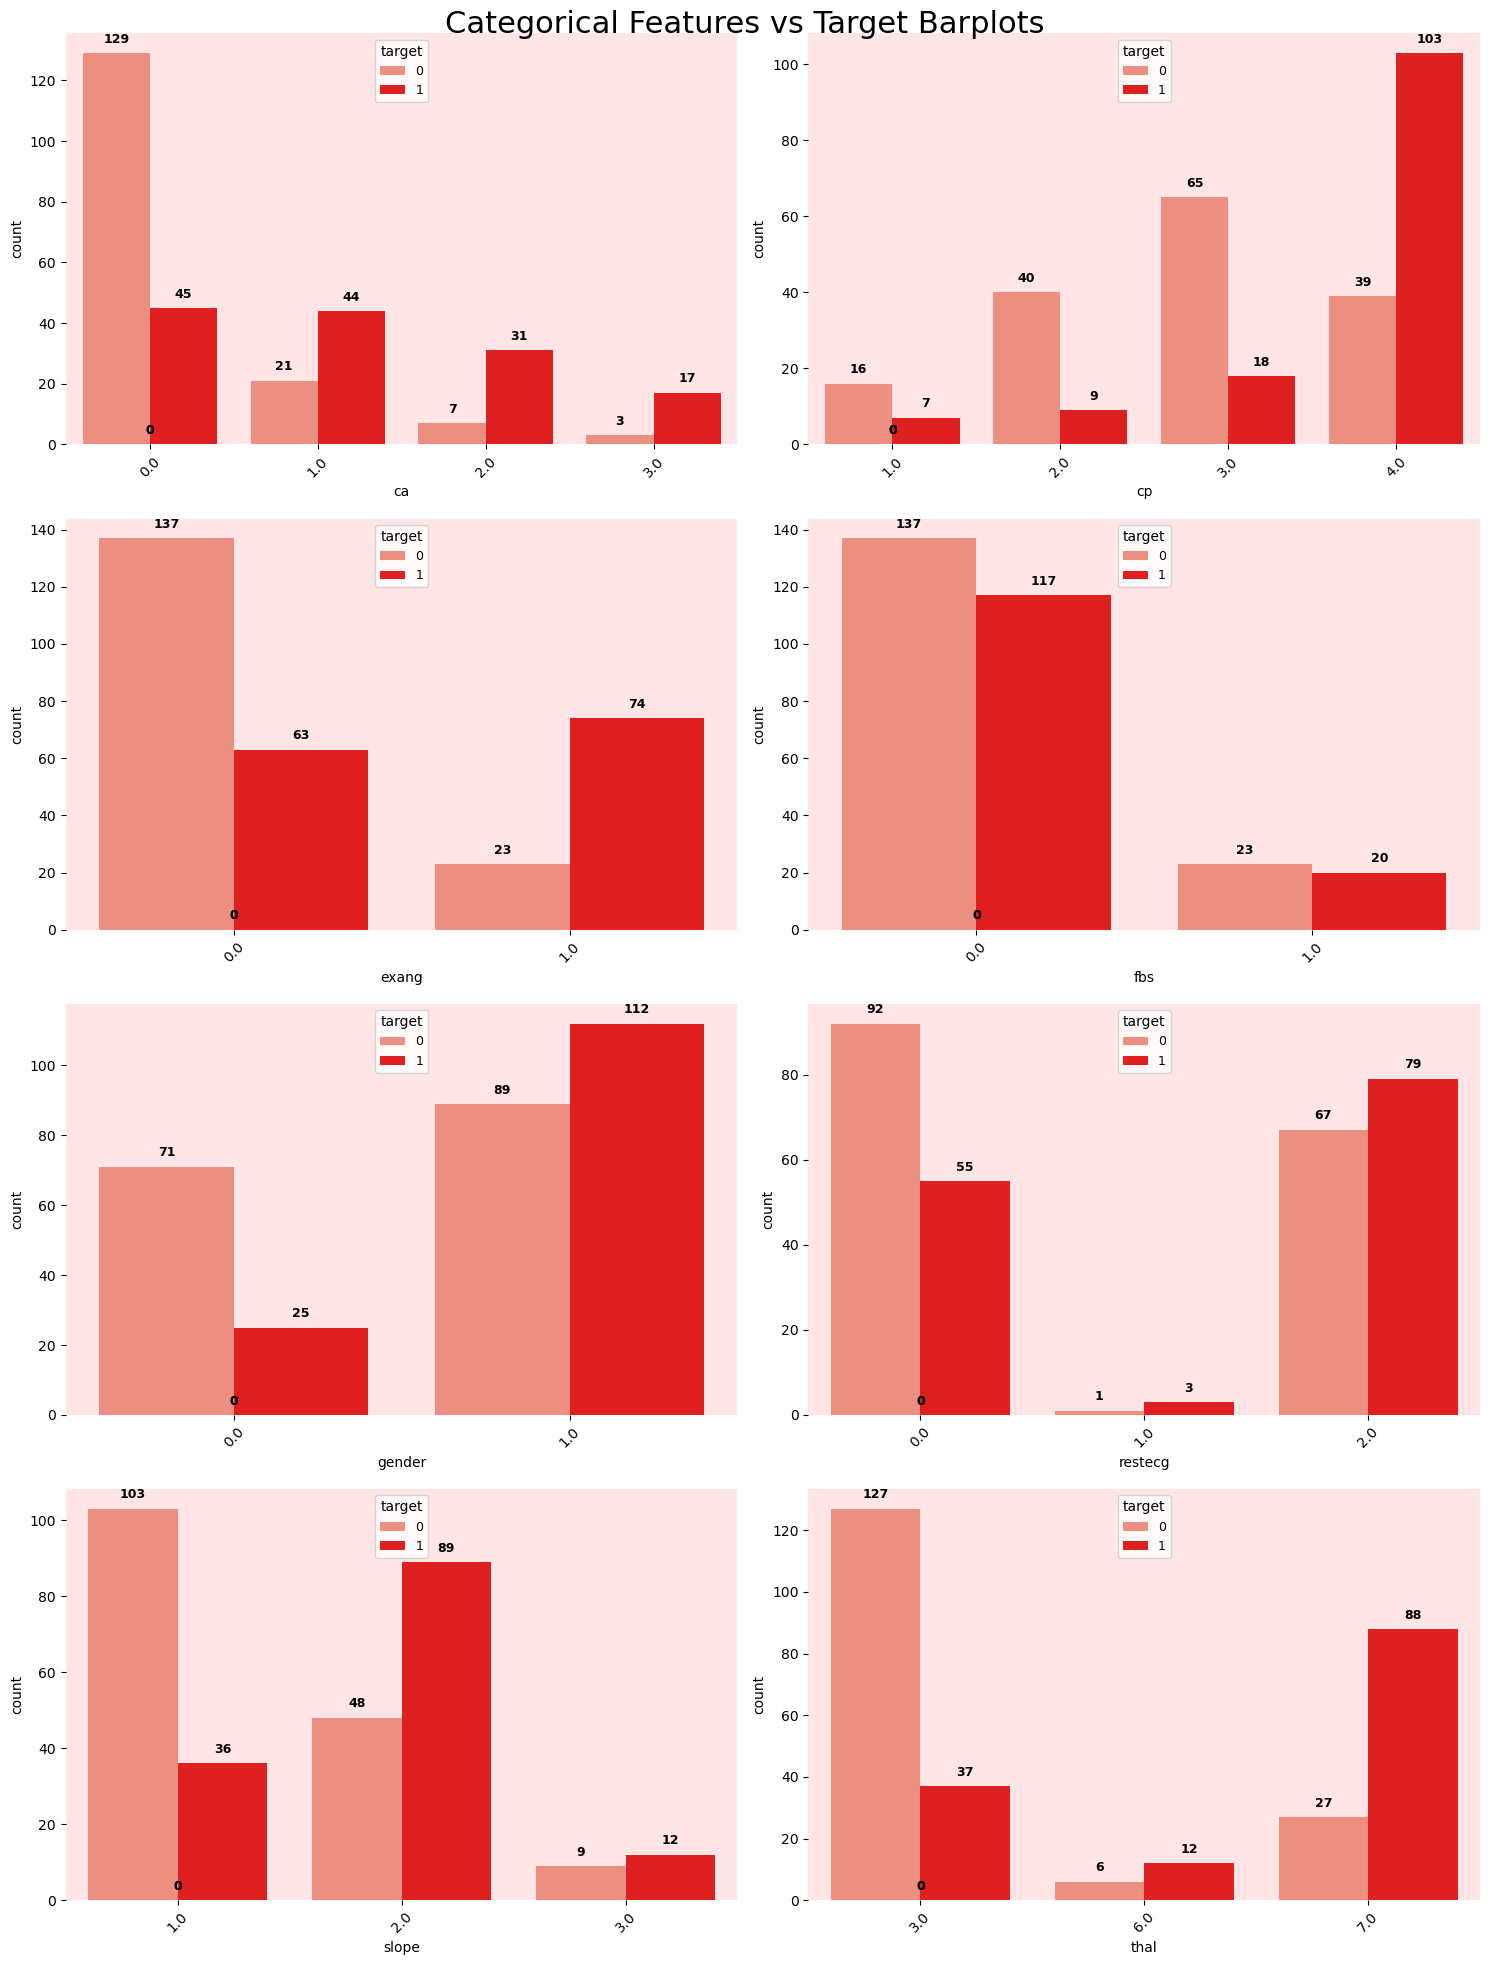

In [22]:
# Define the number of rows and columns in the subplot grid
num_rows = 4
num_cols = 2

fig, ax = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15,20))

# Loop through each categorical feature
for i, col in enumerate(categorical_features):
    # Plot bar charts using Seaborn
    x, y = i // num_cols, i % num_cols
    sns.countplot(data=heart_df, x=col, hue='target', ax=ax[x, y], palette=['#ff826e', 'red'])
    
    # Add counts to the bars
    for p in ax[x, y].patches:
        ax[x, y].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                          ha='center', va='center', xytext=(0, 10), textcoords='offset points', 
                          color='black', fontsize=9, fontweight="bold")
    
    # Rotate xticks
    ax[x, y].tick_params(axis='x', rotation=45)
    
    ax[x,y].set_facecolor('#ffe5e5')  
    
    # Remove outer border kde plor
    for spine in ax[x,y].spines.values():
        spine.set_visible(False)
    
    # Set legend
    ax[x, y].legend(title='target', loc='upper center', fontsize=9, title_fontsize='10')

# Set the title
plt.suptitle('Categorical Features vs Target Barplots', fontsize=22)
plt.tight_layout()
plt.show()

### Inferences:

- Number of Major Vessels (ca): Most of patients with heart disease have higher major vessels colored by fluoroscopy, specially patients with 1,2 and 3 vessels.This suggests that number of Major Vessels (ca) can be influential in predicting the disease.
- Chest Pain Type (cp): type 4 have a higher proportion of heart disease presence compared to other types. This suggests the type of chest pain might be influential in predicting the disease specially patients with type 4 chest pain.
- Exercise Induced Angina (exang): Patients who experience exercise-induced angina (1) show a higher proportion of heart disease presence compared to those who did not (0). This feature can have a impact on the target.
- Fasting Blood Sugar (fbs): The distribution between those with fasting blood sugar > 120 mg/dl (1) and those without (0) is relatively similar, suggesting fbs might have limited impact on heart disease prediction.
- Gender: Females (0) exhibit a lower proportion of heart disease presence compared to males (1). This indicates gender as an influential factor in predicting heart disease.
- Resting Electrocardiographic Results (restecg): Type 2 displays a higher proportion of heart disease presence, indicating that this feature might have some influence on the outcome.
- Slope of the Peak Exercise ST Segment (slope): The slope type 2 has a notably higher proportion of heart disease presence, indicating its potential as a significant predictor.
- Thalium Stress Test Result (thal): The reversible defect category (7) has a higher proportion of heart disease presence compared to the other categories, emphasizing its importance in prediction.

## In summary, based on the visual representation:

Higher Impact on Target: cp, exang, gender, slope, and thal
Moderate Impact on Target: ca, restecg
Lower Impact on Target: fbs

4: Outlier Treatment

In [23]:
continuous_features

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [24]:
Q1 = heart_df[continuous_features].quantile(0.25)
Q3 = heart_df[continuous_features].quantile(0.75)
IQR = Q3 - Q1
outliers_count_specified = ((heart_df[continuous_features] < (Q1 - 1.5 * IQR)) | (heart_df[continuous_features] > (Q3 + 1.5 * IQR))).sum()

outliers_count_specified

age         0
trestbps    9
chol        5
thalach     1
oldpeak     5
dtype: int64

## Upon identifying outliers for the specified continuous features, we found the following:

- trestbps: 9 outliers
- chol: 5 outliers
- thalach: 1 outlier
- oldpeak: 5 outliers
- age: No outliers

Due to small size of our dataset, direct removal of outliers might not be the best approach. Instead, we'll focus on applying transformations like Box-Cox in the subsequent steps to reduce the impact of outliers and make the data more suitable for modeling.

5: Data Preprocessing and Feature Engineering

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
heart_df['target'] = heart_df['target'].astype(int)

In [27]:
X = heart_df.drop(['target'],axis=1)
y = heart_df['target']

In [28]:
print('X shape:',X.shape)
print('y shape:',y.shape)

X shape: (297, 13)
y shape: (297,)


In [29]:
# Perform stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=123)

In [30]:
y_train.dtypes

dtype('int32')

In [31]:
print(pd.Series(y_train).value_counts(normalize = True))
print(pd.Series(y_test).value_counts(normalize = True))

target
0    0.540084
1    0.459916
Name: proportion, dtype: float64
target
0    0.533333
1    0.466667
Name: proportion, dtype: float64


In [32]:
X_train.head()

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
106,59.0,1.0,4.0,140.0,177.0,0.0,0.0,162.0,1.0,0.0,1.0,1.0,7.0
38,55.0,1.0,4.0,132.0,353.0,0.0,0.0,132.0,1.0,1.2,2.0,1.0,7.0
109,39.0,1.0,4.0,118.0,219.0,0.0,0.0,140.0,0.0,1.2,2.0,0.0,7.0
232,49.0,1.0,3.0,118.0,149.0,0.0,2.0,126.0,0.0,0.8,1.0,3.0,3.0
218,64.0,0.0,4.0,130.0,303.0,0.0,0.0,122.0,0.0,2.0,2.0,2.0,3.0


In [33]:
# Separate continuous from categorical columns
num_cols =  X_train._get_numeric_data().columns
num_cols

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak'], dtype='object')

In [34]:
cat_cols = X_train.drop(num_cols, axis=1).columns
cat_cols

Index(['gender', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'], dtype='object')

5.1: Numeric columns: scaling

Distribution of Numeric features as shown above

In [35]:
from sklearn.preprocessing import power_transform

In [36]:
# Adding a small constant to 'oldpeak' to make all values positive
X_train['oldpeak'] = X_train['oldpeak'] + 0.001
X_test['oldpeak'] = X_test['oldpeak'] + 0.001

In [37]:
X_train[num_cols] = power_transform(X_train[num_cols], method='box-cox')

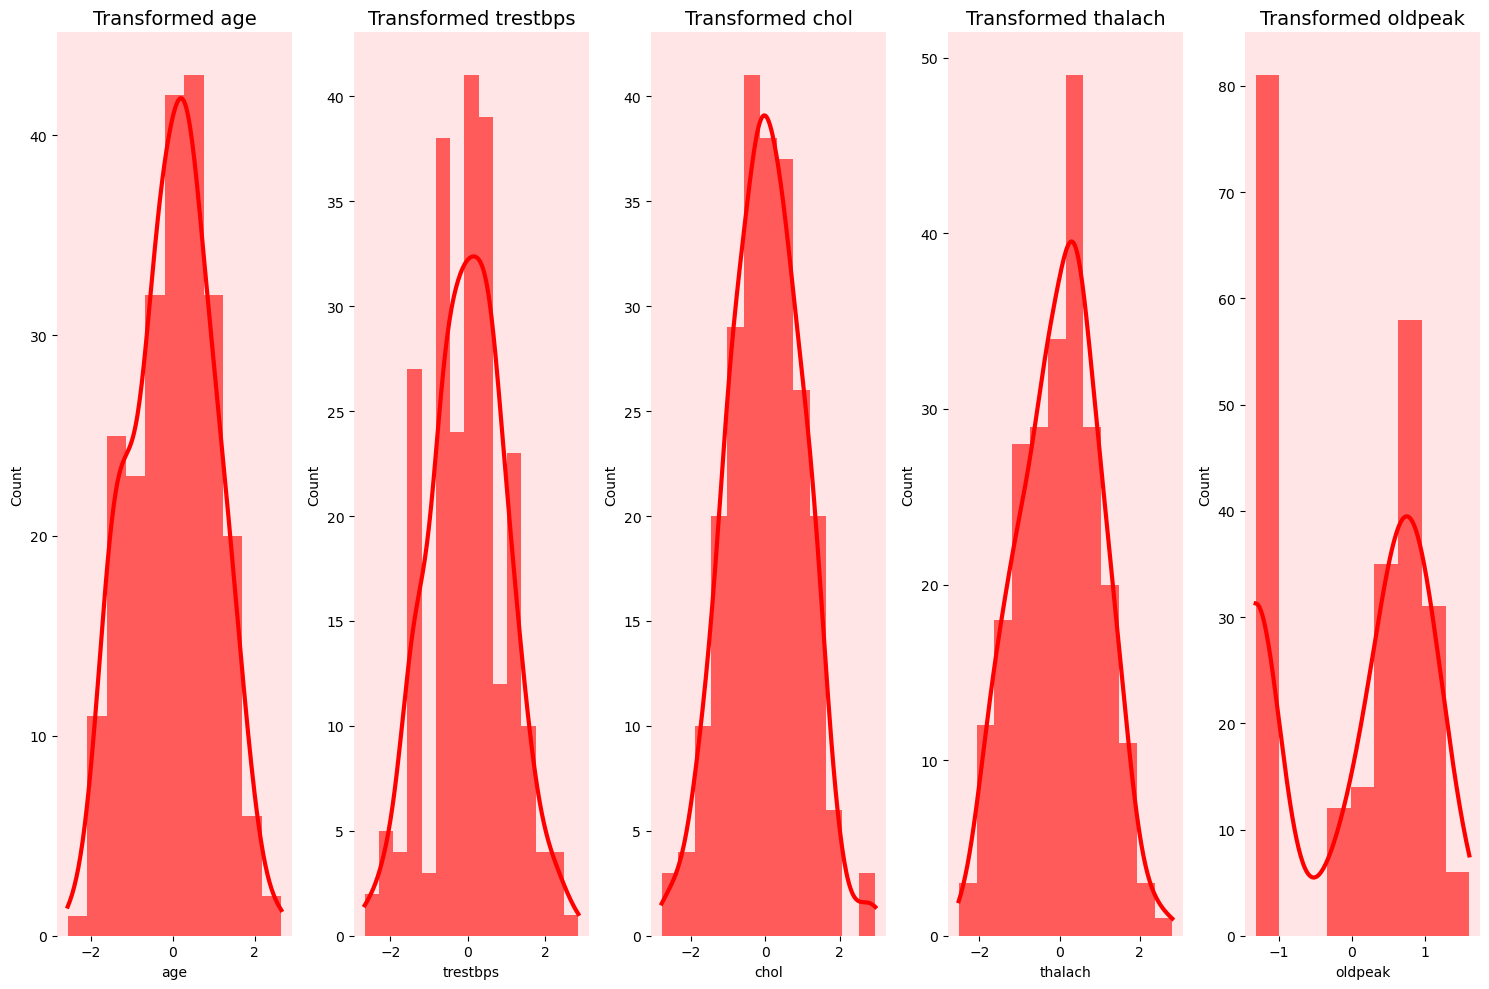

In [38]:
fig, ax = plt.subplots(1, 5, figsize=(15,10))

# Original Distributions
for i, col in enumerate(num_cols):
    sns.histplot(X_train[col], kde=True, ax=ax[i],edgecolor='none', color='red', alpha=0.6, line_kws={'lw': 3}).set_title(f'Transformed {col}', fontsize=14)
    ax[i].set_facecolor('#ffe5e5')
    
    # Remove outer border kde plor
    for spine in ax[i].spines.values():
        spine.set_visible(False)
    
fig.tight_layout()
plt.show()

## Inference:

- age: The transformation has made the age distribution more symmetric, bringing it closer to a normal distribution.

- Trestbps: The distribution of trestbps post-transformation appears to be more normal-like, with reduced skewness.

- Chol: After applying the Box-Cox transformation, chol exhibits a shape that's more aligned with a normal distribution.

- Thalach: The thalach feature was already fairly symmetric before the transformation, and post-transformation, it continues to show a similar shape, indicating its original distribution was close to normal.

- Oldpeak: The transformation improved the oldpeak distribution, but it still doesn't perfectly resemble a normal distribution. This could be due to the inherent nature of the data or the presence of outliers. To enhance its normality, we could consider utilizing advanced transformations such as the Yeo-Johnson transformation, which can handle zero and negative values directly.

5.1.1: Scaling Numeric features to same scale

In [39]:
def ab_scaler(x, a, b, max_x, min_x):
    """
    This function performs scaling or normalization on a given input value 'x' 
    using the linear transformation method with custom scaling parameters 'a' and 'b'. 
    The scaling is applied based on the minimum and maximum values of the input data range.
    
    Parameters:
    - x: The input value to be scaled.
    - a: The lower bound of the desired output range.
    - b: The upper bound of the desired output range.
    - max_x: The maximum value in the original data range.
    - min_x: The minimum value in the original data range.
    
    Returns:
    - scaled_value: The scaled value of 'x' within the specified range [a, b].
    """
    scaled_value = a + ((x - min_x) * (b - a)) / (max_x - min_x)
    return scaled_value

In [40]:
for column in num_cols:
    max = X_train[column].max()
    min = X_train[column].min()
    new_col = str(column + "_scaled")
    X_train[new_col] = X_train[column].apply(lambda x : ab_scaler(x=x, a=-1, b=1, max_x=max, min_x=min))  

In [41]:
numeric_features = X_train.filter(regex='_scaled', axis=1).reset_index(drop = True)

In [ ]:
numeric_features.head()

5.2: Categorical columns: scaling

In [42]:
for column in cat_cols:
    print(X_train[column].value_counts())

gender
1.0    162
0.0     75
Name: count, dtype: int64
cp
4.0    112
3.0     68
2.0     41
1.0     16
Name: count, dtype: int64
fbs
0.0    200
1.0     37
Name: count, dtype: int64
restecg
0.0    123
2.0    111
1.0      3
Name: count, dtype: int64
exang
0.0    164
1.0     73
Name: count, dtype: int64
slope
1.0    114
2.0    107
3.0     16
Name: count, dtype: int64
ca
0.0    137
1.0     54
2.0     28
3.0     18
Name: count, dtype: int64
thal
3.0    133
7.0     88
6.0     16
Name: count, dtype: int64


5.2.1: Binary features

In [43]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [44]:
binary_cols = ['gender','fbs','exang']

for column in binary_cols:
    new_col = str(column + "_be")
    X_train[new_col] = encoder.fit_transform(X_train[column])

In [45]:
binary_features = X_train.filter(regex="_be", axis=1).reset_index(drop = True)

In [46]:
binary_features.head()

,gender_be,fbs_be,exang_be
0,1,0,1
1,1,0,1
2,1,0,0
3,1,0,0
4,0,0,0


5.2.2: Multiclass features

In [47]:
multiclass_cols = list(set(cat_cols) - set(binary_cols))
multiclass_cols

['cp', 'restecg', 'slope', 'thal', 'ca']

In [50]:
categories = []

for column in multiclass_cols:
    categories.append(X_train[column].unique())

categories

[array([4.0, 3.0, 1.0, 2.0], dtype=object),
 array([0.0, 2.0, 1.0], dtype=object),
 array([1.0, 2.0, 3.0], dtype=object),
 array([7.0, 3.0, 6.0], dtype=object),
 array([1.0, 0.0, 3.0, 2.0], dtype=object)]

In [53]:
from sklearn.preprocessing import OneHotEncoder

# specify categories explicitly to allow for same encoding during prediction
onehot_encoder = OneHotEncoder(sparse_output=False, categories = categories)

In [54]:
# Apply OneHotEncoder
multiclass_features = onehot_encoder.fit_transform(X_train[multiclass_cols])

In [55]:
multiclass_features = pd.DataFrame(multiclass_features, columns=onehot_encoder.get_feature_names_out())

In [56]:
multiclass_features.head()

,cp_4.0,cp_3.0,cp_1.0,cp_2.0,restecg_0.0,restecg_2.0,restecg_1.0,slope_1.0,slope_2.0,slope_3.0,thal_7.0,thal_3.0,thal_6.0,ca_1.0,ca_0.0,ca_3.0,ca_2.0
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


5.3: Build Feature dataframe

In [57]:
X_train_fe = pd.concat([numeric_features, binary_features, multiclass_features], axis=1)

In [58]:
X_train_fe.head()

,age_scaled,trestbps_scaled,chol_scaled,thalach_scaled,oldpeak_scaled,gender_be,fbs_be,exang_be,cp_4.0,cp_3.0,...,slope_1.0,slope_2.0,slope_3.0,thal_7.0,thal_3.0,thal_6.0,ca_1.0,ca_0.0,ca_3.0,ca_2.0
0,0.142594,0.166722,-0.602740,0.132034,-1.000000,1,0,1,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-0.038341,0.002813,0.674789,-0.364796,0.354376,1,0,1,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,-0.676470,-0.317415,-0.220384,-0.244785,0.354376,1,0,0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-0.294069,-0.317415,-0.904622,-0.448983,0.222310,1,0,0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.380159,-0.040179,0.382564,-0.502370,0.535134,0,0,0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [59]:
X_train_fe.dtypes

age_scaled         float64
trestbps_scaled    float64
chol_scaled        float64
thalach_scaled     float64
oldpeak_scaled     float64
gender_be            int32
fbs_be               int32
exang_be             int32
cp_4.0             float64
cp_3.0             float64
cp_1.0             float64
cp_2.0             float64
restecg_0.0        float64
restecg_2.0        float64
restecg_1.0        float64
slope_1.0          float64
slope_2.0          float64
slope_3.0          float64
thal_7.0           float64
thal_3.0           float64
thal_6.0           float64
ca_1.0             float64
ca_0.0             float64
ca_3.0             float64
ca_2.0             float64
dtype: object

5.4: Feature Selection

In [60]:
from sklearn.feature_selection import RFECV

In [61]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

selector = RFECV(
    estimator=model,
    min_features_to_select=3,
    scoring='f1',
    cv=7,
)

In [62]:
selector.fit(X_train_fe,y_train)

RFECV(cv=7, estimator=LogisticRegression(), min_features_to_select=3,
      scoring='f1')

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [63]:
X_train_fe.columns[selector.support_]

Index(['thalach_scaled', 'gender_be', 'cp_4.0', 'slope_1.0', 'thal_7.0',
       'ca_0.0'],
      dtype='object')

In [64]:
len(X_train_fe.columns[selector.support_])

6

In [65]:
X_train_fe = X_train_fe.loc[:,selector.support_]
X_train_fe.head()

,thalach_scaled,gender_be,cp_4.0,slope_1.0,thal_7.0,ca_0.0
0,0.132034,1,1.0,1.0,1.0,0.0
1,-0.364796,1,1.0,0.0,1.0,0.0
2,-0.244785,1,1.0,0.0,1.0,1.0
3,-0.448983,1,0.0,1.0,0.0,0.0
4,-0.502370,0,1.0,0.0,0.0,0.0


6: Model Training

In [66]:
from sklearn.model_selection import GridSearchCV

# Define grid
parameters = {'class_weight': [None, 'balanced'], 'solver':['newton-cg', 'lbfgs', 'liblinear','sag','saga']}

model = LogisticRegression(fit_intercept = True, max_iter = 1000)

grid_search = GridSearchCV(model, parameters, cv = 7, scoring = 'f1')
grid_search.fit(X_train_fe, y_train)

GridSearchCV(cv=7, estimator=LogisticRegression(max_iter=1000),
             param_grid={'class_weight': [None, 'balanced'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='f1')

In [81]:
pd.DataFrame((grid_search.cv_results_)).sort_values("rank_test_score").head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,mean_test_score,std_test_score,rank_test_score
5,0.008116,0.004191,0.005119,0.002739,balanced,newton-cg,"{'class_weight': 'balanced', 'solver': 'newton...",0.764706,0.875,0.909091,0.785714,0.758621,0.848485,0.827586,0.824172,0.053063,1
6,0.007057,0.000609,0.005173,0.000513,balanced,lbfgs,"{'class_weight': 'balanced', 'solver': 'lbfgs'}",0.764706,0.875,0.909091,0.785714,0.758621,0.848485,0.827586,0.824172,0.053063,1
7,0.003854,0.000636,0.004853,0.000673,balanced,liblinear,"{'class_weight': 'balanced', 'solver': 'liblin...",0.764706,0.875,0.909091,0.785714,0.758621,0.848485,0.827586,0.824172,0.053063,1
8,0.004652,0.001050,0.005248,0.001022,balanced,sag,"{'class_weight': 'balanced', 'solver': 'sag'}",0.764706,0.875,0.909091,0.785714,0.758621,0.848485,0.827586,0.824172,0.053063,1
9,0.005352,0.000471,0.005637,0.001411,balanced,saga,"{'class_weight': 'balanced', 'solver': 'saga'}",0.764706,0.875,0.909091,0.785714,0.758621,0.848485,0.827586,0.824172,0.053063,1


newton-cg performed well

In [68]:
best_model = grid_search.best_estimator_

In [69]:
best_model.fit(X_train_fe, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, solver='newton-cg')

6.1: Feature Importance

<Axes: xlabel='Feature'>

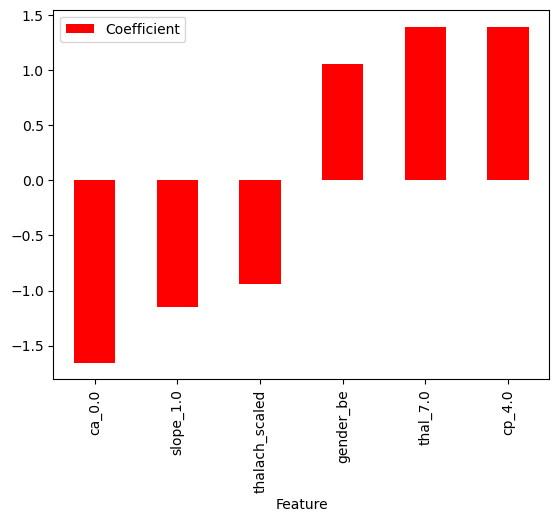

In [70]:
# Feature Importance
feature_importance_df = pd.DataFrame({"Feature": list(X_train_fe.columns), "Coefficient": best_model.coef_[0]})
feature_importance_df.sort_values("Coefficient").plot.bar(x = 'Feature', y='Coefficient',color='red')

In [82]:
feature_importance_df.sort_values("Coefficient", ascending=False)

,Feature,Coefficient
2,cp_4.0,1.397421
4,thal_7.0,1.390449
1,gender_be,1.053402
0,thalach_scaled,-0.944517
3,slope_1.0,-1.146720
5,ca_0.0,-1.654180


## Inference:

- Chest Pain Type (cp = 4):Positive coefficient (1.397509) indicates that a specific type of chest pain (cp = 4) is associated with a higher likelihood of heart disease. Certain types of chest pain may be indicative of underlying heart conditions.
- Thalassemia Type (thal = 7):Positive coefficient (1.390440) suggests that a certain type of thalassemia (thal=7) is associated with a higher likelihood of heart disease. Different types of thalassemia may have varying impacts on heart health.
- Gender (gender_be):Positive coefficient (1.053683) indicates that being a male (gender_be = 1) is associated with a higher likelihood of heart disease compared to being a female. This suggests that gender can play a significant role in heart disease risk assessment.
- Number of Major Vessels Colored by Fluoroscopy (ca = 0):A negative coefficient (-1.654317) suggests that as number of Major Vessels Colored by Fluoroscopy (ca(0))" suggests that a lower number of major vessels colored by fluoroscopy is associated with a higher likelihood of heart disease.
- Thalassemia Maximum Heart Rate (thalach_scaled):Negative coefficient (-0.944771) suggests that higher values of maximum heart rate (thalach_scaled) are associated with lower likelihood of heart disease. Lower maximum heart rate may indicate potential heart health issues.
- Slope of Peak Exercise ST Segment (slope = 1):Negative coefficient (-1.146883) suggests that a certain type of slope of peak exercise ST segment (slope = 1) is associated with a lower likelihood of heart disease. This may indicate a specific pattern in ECG readings associated with lower heart disease risk.

7: Model evaluation

7.1: confusion_matrix

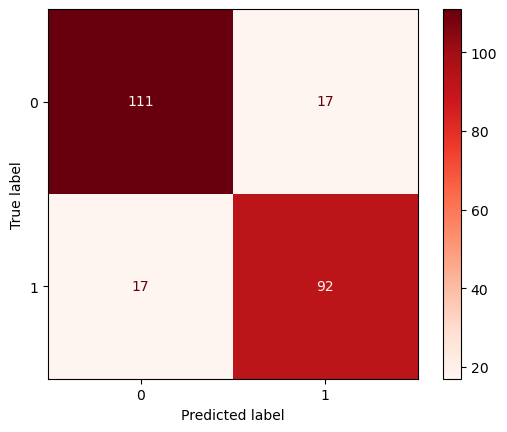

In [83]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
y_pred = best_model.predict(X_train_fe)

cm = confusion_matrix(y_train, y_pred, labels = best_model.classes_)
plt = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
plt.plot(cmap = 'Reds')

7.2: Feature Engineering Pipeline on test data

In [84]:
num_cols

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak'], dtype='object')

In [89]:
# Numeric features
X_test[num_cols] = power_transform(X_test[num_cols], method='yeo-johnson')

for column in num_cols:
    max = X_train[column].max() # keep stats from training
    min = X_train[column].min() # keep stats from training
    new_col = str(column + "_scaled")
    X_test[new_col] = X_test[column].apply(lambda x : ab_scaler(x=x, a=-1, b=1, max_x=max, min_x=min))  

numeric_features_test = X_test.filter(regex='_scaled', axis=1).reset_index(drop = True)


# Categorical features
for column in binary_cols:
    new_col = str(column + "_be")
    X_test[new_col] = encoder.fit_transform(X_test[column])
    
binary_features_test = X_test.filter(regex="_be", axis=1).reset_index(drop = True)

onehot_encoder = OneHotEncoder(sparse_output=False, categories = categories)
multiclass_features_test = onehot_encoder.fit_transform(X_test[multiclass_cols])
multiclass_features_test = pd.DataFrame(multiclass_features_test, columns=onehot_encoder.get_feature_names_out())

X_test_fe = pd.concat([numeric_features_test, binary_features_test, multiclass_features_test], axis=1)
X_test_fe = X_test_fe.loc[:,selector.support_]


In [90]:
X_test.shape

(60, 21)

In [91]:
# Make predictions
y_pred = best_model.predict(X_test_fe)

7.3: Performance Evaluation Metrics

In [92]:
# calculate various performance measures
acc_table = classification_report(y_test, y_pred)

# print the table
print(acc_table)

              precision    recall  f1-score   support

           0       0.93      0.81      0.87        32
           1       0.81      0.93      0.87        28

    accuracy                           0.87        60
   macro avg       0.87      0.87      0.87        60
weighted avg       0.87      0.87      0.87        60



## Inference:

- Accuracy: model achieves an accuracy of 0.87, indicating that it correctly predicts the presence or absence of heart disease in approximately 87% of cases.
- Precision: The precision values for both classes (0 and 1) are relatively high, indicating that the model makes few false positive predictions.
- Recall (Sensitivity): The recall values for both classes are also high, suggesting that the model effectively captures most instances of heart disease (class 1) and non-heart disease (class 0).
- F1-score: The F1-score, which balances precision and recall, is also high for both classes, indicating a good balance between identifying true positives and minimizing false positives.

7.4: ROC curve

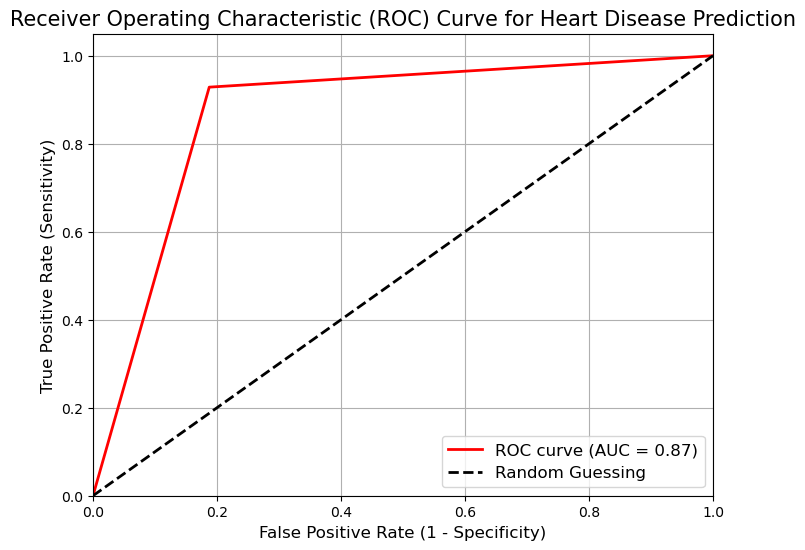

In [93]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curve and ROC area for heart disease prediction
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='black', linestyle='--', lw=2, label='Random Guessing')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)', fontsize=12)
plt.ylabel('True Positive Rate (Sensitivity)', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curve for Heart Disease Prediction', fontsize=15)
plt.legend(loc='lower right', fontsize=12)
plt.grid(True)
plt.show()